## Machine Learning & Statistics Tasks 

***

Author: Emma Dunleavy

Module Machine Learning & Statistics Winter 2023/24 4679

Lecturer: Ian McLoughlin
***

<div class="alert alert-block alert-info">
<b>Note:</b> Refer to README file for complete list of references used.
</div>



In [ ]:
# Import required libraries/statistics packages.
# Statistics.
import scipy.stats as ss
from scipy.stats import chi2_contingency

# Mathmatical operations
import numpy as np

# Data frames.
import pandas as pd

# Statistical data visualisation
import seaborn as sns

# Data visualisation
import matplotlib.pyplot as plt

### Task 1 - Square Roots

***

>Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as `math`. In this task, you should write a function `sqrt(x)` to 
approximate the square root of a floating point number $x$ without using the power operator or a package.

>Rather, you should use Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z_{i + 1}$ is less than some threshold, say 0.01.

$$ z_{i+1} = z_i - \frac{z_i * z_i - x} {2z_i}$$


In [30]:
def sqrt(no, error=0.00000001):                     
    guess = no                                      # first guess is the number inputted
    diff = 99999999
    while diff > error:
        new_guess = guess - ((guess**2 - no) / (2*guess)) # Newtons method
        diff = new_guess - guess
        if diff < 0:
            diff *= -1                                     # to convert to an absolute value

        guess = new_guess                                  # update existing guess
    return guess

no = float(input("Please enter a positive number: "))  #to input a positive floating point number

print (f"The square root of {no} is ~", (sqrt (no))) # to print approximate sq rt of original inputted value 

The square root of 9.0 is ~ 3.0


In [31]:
x = 8.0

Output 

*The square root of 8.0 is ~ 2.8284271247461903*

Test using double asterisk.

In [32]:
8**0.5

2.8284271247461903

Output 

*2.8284271247461903*

Confirms the code correctly determines the square root using Newton's method.

In [33]:
z = 4

In [34]:
z = z - (((z * z) - x) / (2 * z))

z

3.0

In [35]:
z = 4 - ((4 * 4)-8) / (2 * 4)

z

3.0

### Task 2 - Chi-Square Test

***

Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use `scipy.stats` to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.

<center>

   | |  |   Biscuit |   |   
|---:|:-------------|:-----------:|:------:|
| |   |       Chocolate |  Plain  |   
|**Drink** |  Coffee  |       43  |  57  |   
| | Tea  |  56   |  45   |    


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html


In [37]:
# Assign the contingency table to an array called table.
table = np.array([[43, 57], [56, 45]])

# Show.
table

array([[43, 57],
       [56, 45]])

In [38]:
# Using chi2_contingency from scipy.stats pass in table, with Yeats correction factor set to False.

result = chi2_contingency(table, correction = False)

#Show.
result

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]]))

### Task 2 Conclusion 

Using a significance level of `5%`, as the `pvalue` is $> 0.05$ we would accept the null hypothesis; that there is no relationship between tea and coffee drinks and their preferance to chocolate and plain biscuits. 

### Task 3  - t-Test on Penguin Data Set
***


Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

In [45]:
# Get data frame from raw data in url.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Show.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Define sample set male_sample, the body mass of the males in the data set.
male_sample = df[df["sex"] == "MALE"]["body_mass_g"].to_numpy()

# Show.
male_sample


array([3750., 3650., 4675., 3800., 4400., 4500., 4200., 3600., 3950.,
       3800., 3550., 3950., 3900., 3900., 4150., 3950., 4650., 3900.,
       4400., 4600., 3425., 4150., 4300., 4050., 3700., 3800., 3750.,
       4400., 4050., 3950., 4100., 4450., 3900., 4150., 4250., 3900.,
       4000., 4700., 4200., 3550., 3800., 3950., 4300., 4450., 4300.,
       4350., 4100., 4725., 4250., 3550., 3900., 4775., 4600., 4275.,
       4075., 3775., 3325., 3500., 3875., 4000., 4300., 4000., 3500.,
       4475., 3900., 3975., 4250., 3475., 3725., 3650., 4250., 3750.,
       4000., 3900., 3650., 3725., 3750., 3700., 3775., 4050., 4050.,
       3300., 4400., 3400., 3800., 4150., 3800., 4550., 4300., 4100.,
       3600., 4800., 4500., 3950., 3550., 4450., 4300., 3250., 3950.,
       4050., 3450., 4050., 3800., 3950., 4000., 3775., 4100., 5700.,
       5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300., 5350.,
       5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400., 5250.,
       5350., 5700.,

In [ ]:
# Define sample set female_sample, the body mass of the females in the data set.

female_sample = df[df["sex"] == "FEMALE"]["body_mass_g"].to_numpy()

# Show.

female_sample

array([3800., 3250., 3450., 3625., 3200., 3700., 3450., 3325., 3400.,
       3800., 3800., 3200., 3150., 3250., 3300., 3325., 3550., 3300.,
       3150., 3100., 3000., 3450., 3500., 3450., 2900., 3550., 2850.,
       3150., 3600., 2850., 3350., 3050., 3600., 3550., 3700., 3700.,
       3550., 3200., 3800., 3350., 3500., 3600., 3550., 3400., 3300.,
       3700., 2900., 3725., 3075., 2925., 3750., 3175., 3825., 3200.,
       3900., 2900., 3350., 3150., 3450., 3050., 3275., 3050., 3325.,
       3500., 3425., 3175., 3400., 3400., 3050., 3000., 3475., 3450.,
       3700., 3500., 3525., 3950., 3250., 4150., 3800., 3700., 3575.,
       3700., 3450., 3600., 2900., 3300., 3400., 3700., 3200., 3350.,
       3900., 3850., 2700., 3650., 3500., 3675., 3400., 3675., 3325.,
       3600., 3350., 3250., 3525., 3650., 3650., 3400., 3775., 4500.,
       4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150., 4800.,
       5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950., 4350.,
       3950., 4300.,

Text(0.5, 1.0, 'Histogram of the Body Mass of Male (blue) and Female (orange) Penguins ')

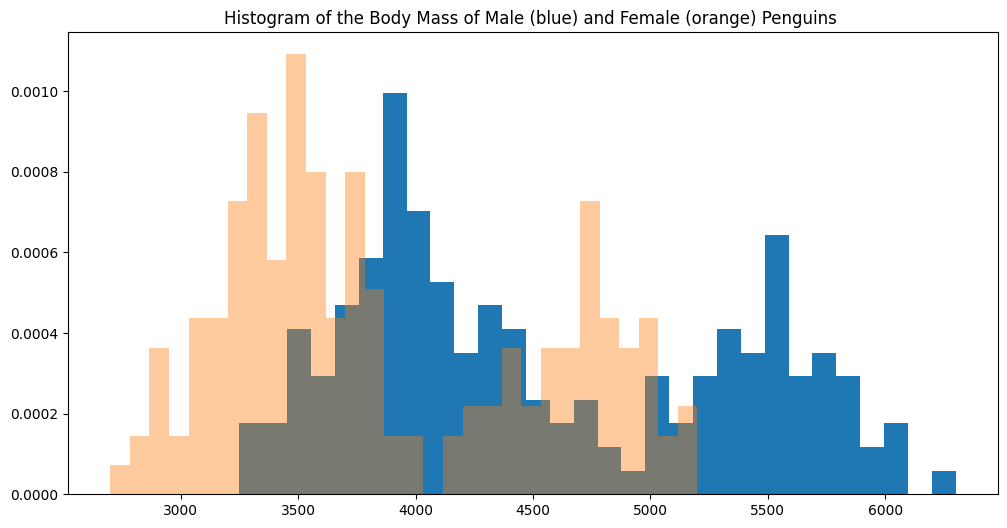

In [46]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(male_sample, bins=30, density=True)
ax.hist(female_sample, bins=30, density=True, alpha=0.40)
plt.title("Histogram of the Body Mass of Male (blue) and Female (orange) Penguins ")

In [ ]:
# Do t-Test.

ss.ttest_ind(male_sample, female_sample)

Ttest_indResult(statistic=8.541720337994516, pvalue=4.897246751596224e-16)

The t-statistic is a measure of the difference between the two sets expressed in units of standard error.


Sample sizes are different therefore the t-test for unequal sample sizes mst be used. 

#### Independent two-sample t-test, with unequal sample sizes

### $ t = {\frac {\bar X_1 - \bar X_2}{s_p \cdot \sqrt {\frac{1}{n_1} + \frac {1}{n_2}}}}$

where

### $s_p = \sqrt{\frac{{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}}{{n_1 + n_2 - 2}}}$

In [ ]:
# Get number of males in the sample
n1 = df["sex"].value_counts()["MALE"]

In [ ]:
# Get number of females in the sample.
n2 = df["sex"].value_counts()["FEMALE"]

In [ ]:
# Get mean of male_sample body mass
male_mean = male_sample.mean()

# Show.
male_mean

4545.684523809524

In [ ]:
# Get mean of female_sample body mass
female_mean = female_sample.mean()

# Show.
female_mean

3862.2727272727275

In [ ]:
# Get male standard deviation of body mass.
s1 = np.std(male_sample, ddof=1)

# Show.
s1

787.6288841581744

In [ ]:
# Get female standard deviation.
s2 = np.std(female_sample, ddof=1)

# Show.
s2

666.1720495161449

In [ ]:
# Calculate sp
a = ((n1 - 1)*(s1**2)) + ((n2 -1)*(s2**2))
b = n1 + n2 - 2

sp = np.sqrt(a/b)

# Show.
sp

729.9811051791228

In [ ]:
# Calculate t

a1 = male_mean - female_mean
b1 = sp*np.sqrt((1/n1)+(1/n2))

t = a1/b1

# Show.
t

8.541720337994514

Text(0.5, 1.0, 'Independent Sample T-Test of the Body Mass of Male and Female Penguins ')

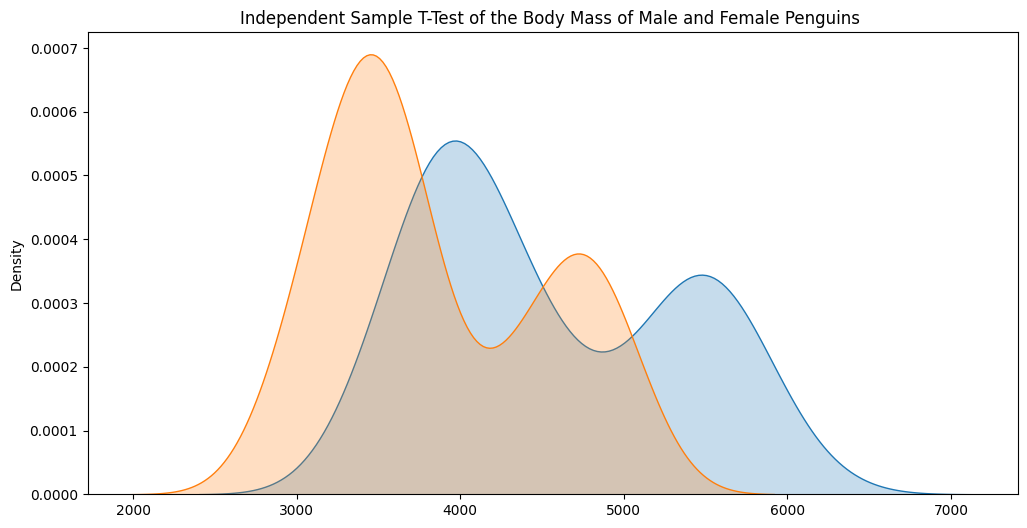

In [41]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))
                       
# Kernel density estimate plot.
sns.kdeplot(male_sample, fill=True)
sns.kdeplot(female_sample, fill=True)
plt.title("Independent Sample T-Test of the Body Mass of Male and Female Penguins ")

#### Task 3 Conclusion


The task was to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins. The null hypothesis states there is no significant difference between the mean values of the two populations of penguins, the male population and the female population. The t-test is completed using two sample sets within the population, and when ran a p-value of $4.897e-16$ is observed. This indicates there is a very low probability that the mean values of the two populations are the same and we reject the null hypothesis and can instead state there is a significant difference in the body mass of male and female gentoo penguins. 

***
# End